# Airline Customer Satisfaction Analysis

Decision Tree - Predict if the customer is satisfied or not 

### Imports

In [58]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [59]:
#Basic package imports.
import numpy as np
import pandas as pd

# Important imports for preprocessing, modeling, and evaluation.
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics

# Visualization package imports.
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier


from sklearn.tree import plot_tree

from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
from sklearn.metrics import recall_score, precision_score, f1_score, accuracy_score
from sklearn.metrics import classification_report

### Read in Dataset

In [11]:
df_raw = pd.read_csv('Invistico_Airline.csv')

### Exploratory Data Analysis

In [12]:
df_raw.shape

(129880, 22)

In [13]:
df_raw.head()

,satisfaction,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,satisfied,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,2,...,2,3,3,0,3,5,3,2,0,0.0
1,satisfied,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,3,...,2,3,4,4,4,2,3,2,310,305.0
2,satisfied,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,3,...,2,2,3,3,4,4,4,2,0,0.0
3,satisfied,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,3,...,3,1,1,0,1,4,1,3,0,0.0
4,satisfied,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,3,...,4,2,2,0,2,4,2,5,0,0.0


In [14]:
df_raw.dtypes

satisfaction                          object
Customer Type                         object
Age                                    int64
Type of Travel                        object
Class                                 object
Flight Distance                        int64
Seat comfort                           int64
Departure/Arrival time convenient      int64
Food and drink                         int64
Gate location                          int64
Inflight wifi service                  int64
Inflight entertainment                 int64
Online support                         int64
Ease of Online booking                 int64
On-board service                       int64
Leg room service                       int64
Baggage handling                       int64
Checkin service                        int64
Cleanliness                            int64
Online boarding                        int64
Departure Delay in Minutes             int64
Arrival Delay in Minutes             float64
dtype: obj

In [15]:
df_raw.isnull().sum()

satisfaction                           0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Seat comfort                           0
Departure/Arrival time convenient      0
Food and drink                         0
Gate location                          0
Inflight wifi service                  0
Inflight entertainment                 0
Online support                         0
Ease of Online booking                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Cleanliness                            0
Online boarding                        0
Departure Delay in Minutes             0
Arrival Delay in Minutes             393
dtype: int64

### Drop Missing Values

In [16]:
df_trans = df_raw.dropna()

In [17]:
df_trans.shape

(129487, 22)

### Check Class Balance

In [18]:
counts = df_trans['satisfaction'].value_counts(dropna = False)
counts

satisfaction
satisfied       70882
dissatisfied    58605
Name: count, dtype: int64

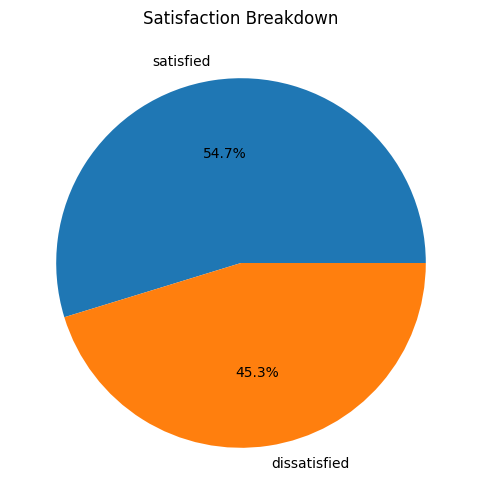

In [19]:

plt.figure(figsize=(6,6))
plt.pie(counts, labels=counts.index, autopct='%1.1f%%')
plt.title("Satisfaction Breakdown")
plt.show()

54.7% (70,882/129,487) of customers were satisfied

45.3% (58,605/129,487) of customers were dissatisfied

### Feature Transformations

Change target variable to binary and change object data types to integers

- Satisfaction (Target Variable)
- Customer Type
- Type of Travel
- Class

In [20]:
df_trans['satisfaction'] = df_trans['satisfaction'].map({'satisfied': 1, 'dissatisfied': 0})

/var/folders/32/55n3rlzs07gcgfbl58kqw09r0000gn/T/ipykernel_4081/4053444353.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_trans['satisfaction'] = df_trans['satisfaction'].map({'satisfied': 1, 'dissatisfied': 0})


In [21]:
df_trans['Customer Type'].unique()

array(['Loyal Customer', 'disloyal Customer'], dtype=object)

In [22]:
df_trans['Customer Type'] = df_trans['Customer Type'].map({'Loyal Customer': 1, 'disloyal Customer': 0})

/var/folders/32/55n3rlzs07gcgfbl58kqw09r0000gn/T/ipykernel_4081/2263277241.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_trans['Customer Type'] = df_trans['Customer Type'].map({'Loyal Customer': 1, 'disloyal Customer': 0})


In [23]:
df_trans['Class'].unique()

array(['Eco', 'Business', 'Eco Plus'], dtype=object)

In [24]:
df_trans['Class'] = df_trans['Class'].map({'Eco': 1, 'Business': 2, 'Eco Plus': 3})

/var/folders/32/55n3rlzs07gcgfbl58kqw09r0000gn/T/ipykernel_4081/3470889694.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_trans['Class'] = df_trans['Class'].map({'Eco': 1, 'Business': 2, 'Eco Plus': 3})


In [25]:
df_trans['Type of Travel'].unique()

array(['Personal Travel', 'Business travel'], dtype=object)

In [26]:
df_trans['Type of Travel'] = df_trans['Type of Travel'].map({'Personal Travel': 0, 'Business travel': 1})

/var/folders/32/55n3rlzs07gcgfbl58kqw09r0000gn/T/ipykernel_4081/114691903.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_trans['Type of Travel'] = df_trans['Type of Travel'].map({'Personal Travel': 0, 'Business travel': 1})


In [27]:
df_trans.dtypes

satisfaction                           int64
Customer Type                          int64
Age                                    int64
Type of Travel                         int64
Class                                  int64
Flight Distance                        int64
Seat comfort                           int64
Departure/Arrival time convenient      int64
Food and drink                         int64
Gate location                          int64
Inflight wifi service                  int64
Inflight entertainment                 int64
Online support                         int64
Ease of Online booking                 int64
On-board service                       int64
Leg room service                       int64
Baggage handling                       int64
Checkin service                        int64
Cleanliness                            int64
Online boarding                        int64
Departure Delay in Minutes             int64
Arrival Delay in Minutes             float64
dtype: obj

In [28]:
df_trans.head(10)

,satisfaction,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,1,1,65,0,1,265,0,0,0,2,...,2,3,3,0,3,5,3,2,0,0.0
1,1,1,47,0,2,2464,0,0,0,3,...,2,3,4,4,4,2,3,2,310,305.0
2,1,1,15,0,1,2138,0,0,0,3,...,2,2,3,3,4,4,4,2,0,0.0
3,1,1,60,0,1,623,0,0,0,3,...,3,1,1,0,1,4,1,3,0,0.0
4,1,1,70,0,1,354,0,0,0,3,...,4,2,2,0,2,4,2,5,0,0.0
5,1,1,30,0,1,1894,0,0,0,3,...,2,2,5,4,5,5,4,2,0,0.0
6,1,1,66,0,1,227,0,0,0,3,...,5,5,5,0,5,5,5,3,17,15.0
7,1,1,10,0,1,1812,0,0,0,3,...,2,2,3,3,4,5,4,2,0,0.0
8,1,1,56,0,2,73,0,0,0,3,...,5,4,4,0,1,5,4,4,0,0.0
9,1,1,22,0,1,1556,0,0,0,3,...,2,2,2,4,5,3,4,2,30,26.0


In [29]:
y = df_trans.iloc[:,0]

In [30]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: satisfaction, dtype: int64

In [31]:
X = df_trans.iloc[:,1:]

In [32]:
X.head()

,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,1,65,0,1,265,0,0,0,2,2,...,2,3,3,0,3,5,3,2,0,0.0
1,1,47,0,2,2464,0,0,0,3,0,...,2,3,4,4,4,2,3,2,310,305.0
2,1,15,0,1,2138,0,0,0,3,2,...,2,2,3,3,4,4,4,2,0,0.0
3,1,60,0,1,623,0,0,0,3,3,...,3,1,1,0,1,4,1,3,0,0.0
4,1,70,0,1,354,0,0,0,3,4,...,4,2,2,0,2,4,2,5,0,0.0


### Model Building 
- Decision Tree 

Missing values from 'Arrival Delay in Minutes' were excluded from the decision tree model as part of feature selection, to maintain focused analysis on the inflight customer experience. Because arival delays can be driven by operational or safety related factors outside of the scope of this analysis.

Satisfaction is our target variable and will take the values {0,1} with 'satisfied' being the positive outcome 1.

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [35]:
y_train.shape

(103589,)

In [36]:
y_test.shape

(25898,)

In [37]:
dtc = DecisionTreeClassifier(random_state=42)

In [38]:
dtc.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'random_state': 42,
 'splitter': 'best'}

In [39]:
dtc.fit(X_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [40]:
y_pred = dtc.predict(X_test)

### Model Evaluation 

In [41]:
print(confusion_matrix(y_test, y_pred))

[[10803   918]
 [  877 13300]]


In [42]:
def conf_matrix_plot(model, x_data, y_data):
    '''
    Accepts as argument model object, X data (test or validate), and y data (test or validate). 
    Returns a plot of confusion matrix for predictions on y data.
    ''' 
  
    model_pred = model.predict(x_data)
    cm = confusion_matrix(y_data, model_pred, labels=model.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=model.classes_)
  
    disp.plot(values_format='')  # `values_format=''` suppresses scientific notation
    plt.show()

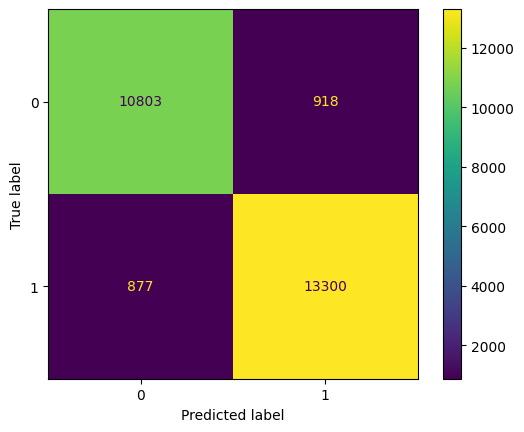

In [43]:
conf_matrix_plot(dtc, X_test, y_test)

In [44]:
from sklearn.metrics import classification_report

In [45]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.92      0.92     11721
           1       0.94      0.94      0.94     14177

    accuracy                           0.93     25898
   macro avg       0.93      0.93      0.93     25898
weighted avg       0.93      0.93      0.93     25898



- Accuracy - Out of all the prediction the model made how many were correct?
- With 93% Accuracy this model predicts if a customer would be satisfied or not and the most important feature in predicting customer satisfaction is Inflight entertainment. 
- Precision - When a model predicts 1 (satisfied) how often is it right? 
- With 94% Precision when the model predicts customer satisfiaction it is correct 94% of the time. While the remaining 6% were false positives.
- Recall - Out of the true positives in the model how many were sucessfully found? (%true positives in data present in model)
- 94% of the true positives present in the model were successfully identified by the model 
- F1 - How good is the model at being both accurate when it predicts positive (precision) and thorough in finding positives (recall)? Balances precision and recall
- F1 of 94% shows the model is highly reliable( accurate and consistent) at both correctly predicting satisfied customers and successfully identifying true satisfied customers

### Model Results

In [46]:
features = pd.DataFrame(dtc.feature_importances_, index = X.columns, columns=['Importance']).sort_values('Importance', ascending=False)

In [47]:
features.head(25)

,Importance
Inflight entertainment,0.394369
Seat comfort,0.177473
Ease of Online booking,0.060792
Flight Distance,0.046200
Departure/Arrival time convenient,0.030998
Age,0.026773
Customer Type,0.024407
Type of Travel,0.023359
Leg room service,0.021268
On-board service,0.021126


In [48]:
feature_importances = dtc.feature_importances_

In [49]:
feature_importances

array([0.02440658, 0.02677316, 0.0233588 , 0.01577082, 0.04619959,
       0.17747265, 0.03099772, 0.01618466, 0.01945628, 0.01046842,
       0.39436889, 0.02093228, 0.06079247, 0.02112615, 0.02126844,
       0.02035423, 0.01900474, 0.0202356 , 0.00929891, 0.00974331,
       0.01178632])

In [50]:
tree_importances = pd.Series(feature_importances, index=X.columns).sort_values(ascending=False)

Text(0, 0.5, 'Importance')

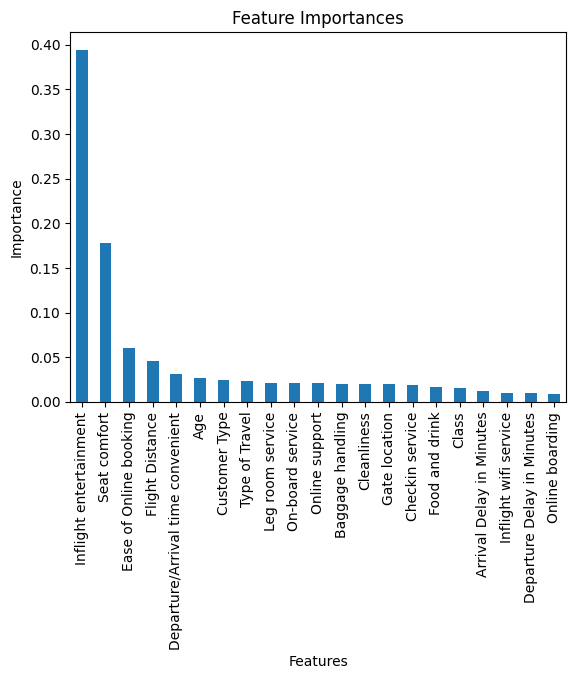

In [51]:
fig, ax = plt.subplots()
tree_importances.plot.bar(ax=ax);
ax.set_title("Feature Importances")
ax.set_xlabel("Features")
ax.set_ylabel("Importance")

Inflight entertainment is the most important feature in predicting customer satisfaction according to the decision tree model.

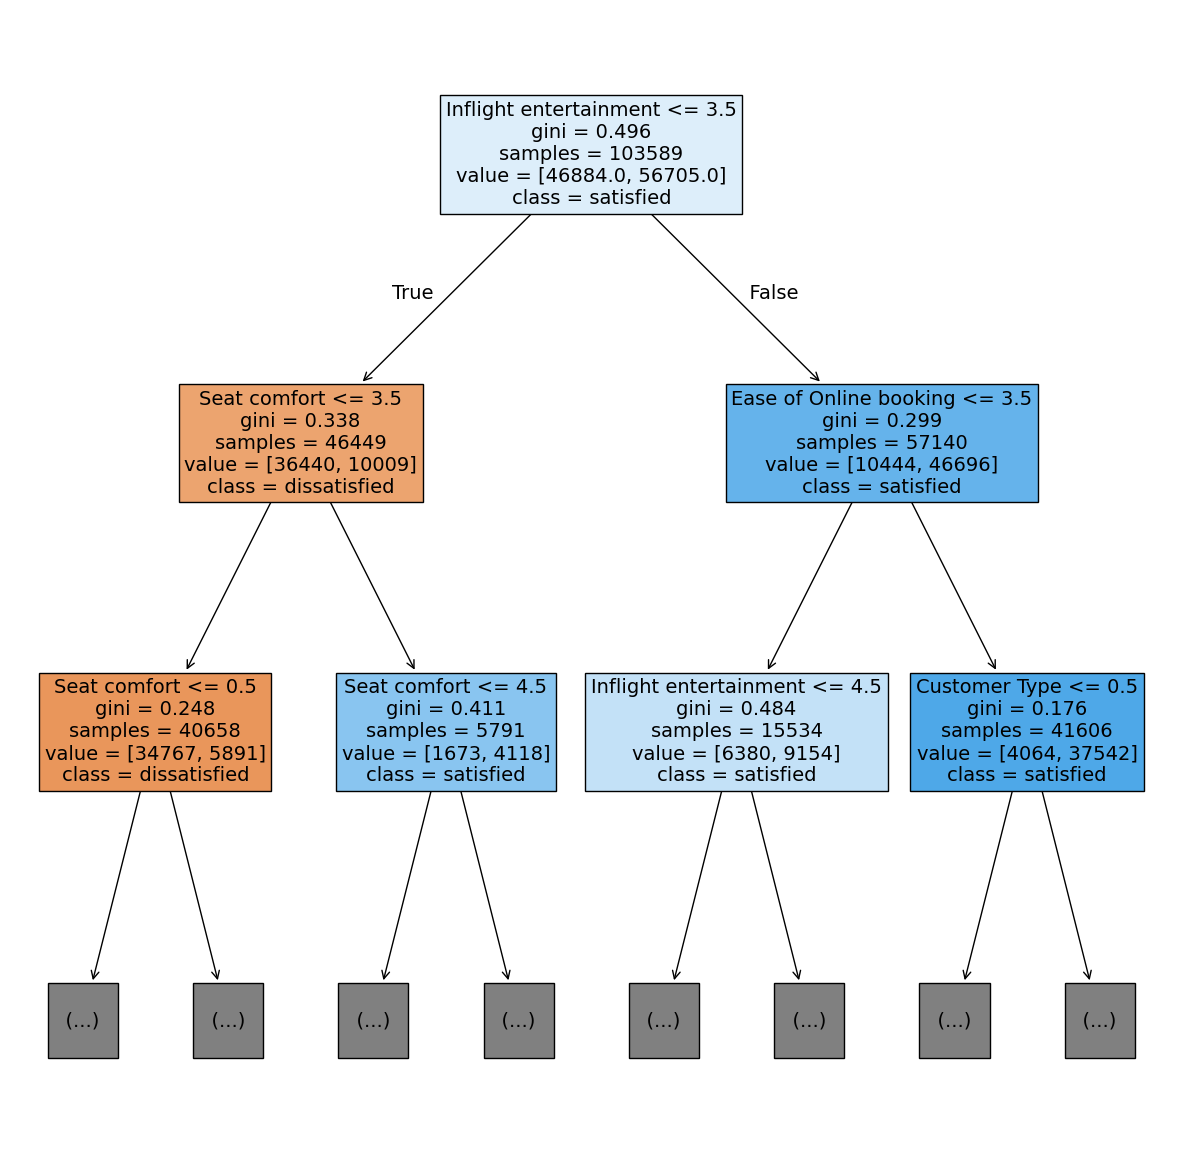

In [55]:
plt.figure(figsize=(15,15))
plot_tree(
    dtc, 
    max_depth=2, 
    fontsize=14, 
    feature_names=X.columns, 
          class_names={0:'dissatisfied', 1:'satisfied'}, 
    filled=True);
plt.show()

RIGHT BRANCH 
- Good inflight entertainment is a strong indicator of satisfaction, even if booking wasn’t great.
- Certain types of customers (likely returning vs. new) are highly correlated with satisfaction.

LEFT BRANCH
- Root node Inflight entertainment rating is the strongest first split in predicting satisfaction.
- Among customers with inflight entertainment ratings of 3.5 or less, if seat comfort ≤ 3.5, the model predicts dissatisfaction as the customers are much more likely to be dissatisfied. 
- The model predicts, when inflight entertainment is 3.5 or less andEven if entertainment is low, higher seat comfort partially rescues satisfaction.


- Low inflight entertainment → strong dissatisfaction
- Low seat comfort → even stronger dissatisfaction
- Good inflight entertainment → satisfaction regardless of other factors
- Some customer types are much more satisfied overall
- Ease of online booking matters, but less than entertainment and comfort
